In [ ]:
%%time
from src.data.make_dataset import load_list, get_stock_data
from src.models.StockModel import StockModel
window_size = 20
start_date = '2017-01-01'
end_date = '2024-08-25'
feature_columns = ['Close', 'Open', 'Low', 'High', 'Volume']
target = "Open"
mode = "basic_upgrade"

# Load symbols
indexes_symbols = load_list("indexes")
nasdaq_symbols = load_list("NASDAQ")
sp500_symbols = load_list("SP500")

# Test tickers, sp500 symbols not also in nasdaq
test_tickers = [item for item in sp500_symbols if item not in nasdaq_symbols]
test_tickers = test_tickers[:30]

#tickers = ['^GSPC', '^IXIC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'AVGO', 'META', 'GOOGL', 'GOOG', 'MMM', 'ADBE', 'BWA', 'GD', 'IT']
#tickers = ['^GSPC', '^IXIC']
train_tickers = indexes_symbols + nasdaq_symbols
train_tickers = train_tickers[:50]

# Download data
combined_data = get_stock_data(train_tickers, "1d", start_date, end_date)
combined_data.info()
# Test data
test_data = get_stock_data(test_tickers, "1d", start_date, end_date)

# Create and train model
stock_model = StockModel(window_size=window_size, feature_columns=feature_columns, target_name=target, mode=mode)

stock_model.train(combined_data, patience=15, epochs=150, graph=False)
loss, mape, r2 = stock_model.evaluate_many(test_data, graph=False)
print(f"Evaluation results: Loss {loss} MAPE {mape} R2 {r2}")

stock_model.save(f"{window_size}_GSPC_IXIC.keras")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2017-01-03 00:00:00-05:00 to 2024-08-23 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1923 non-null   float64
 1   High          1923 non-null   float64
 2   Low           1923 non-null   float64
 3   Close         1923 non-null   float64
 4   Volume        1923 non-null   int64  
 5   Dividends     1923 non-null   float64
 6   Stock Splits  1923 non-null   float64
 7   Ticker        1923 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 135.2+ KB
Initializing model:
 - Window size: 20
 - Features: ['Close', 'Open', 'Low', 'High', 'Volume']
 - Target: Open
--- Preparing ^GSPC data using 20 window---
Feature columns: ['Close', 'Open', 'Volume', 'Range', 'RSI']
Target column: Open
Feature min [2.23739990e+03 2.26160010e+03 1.29653000e+09 3.79003906e+00
 4.00986440e+00]
Feature max [5.66720020e+0

'\nstock_model.train(combined_data, patience=1, epochs=150, graph=False)\nloss, mape, r2 = stock_model.evaluate_many(test_data, graph=False)\nprint(f"Evaluation results: Loss {loss} MAPE {mape} R2 {r2}")\n\nstock_model.save(f"{window_size}_GSPC_IXIC.keras")'

Feature columns: ['Close', 'Open', 'Volume', 'Range']
Target column: Open
Feature min [1.74855087e+02 1.72246795e+02 1.64090000e+06 1.10917591e+00]
Feature max [2.89253571e+02 2.88885005e+02 2.41496000e+07 1.53765616e+01]
Target min [172.24679508]
Target max [288.88500521]
Predict with X shape: (524, 20, 4)
Target min [172.24679508]
Target max [288.88500521]
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Loss: 4.1622 MAPE: 0.0066 R2: 0.9949


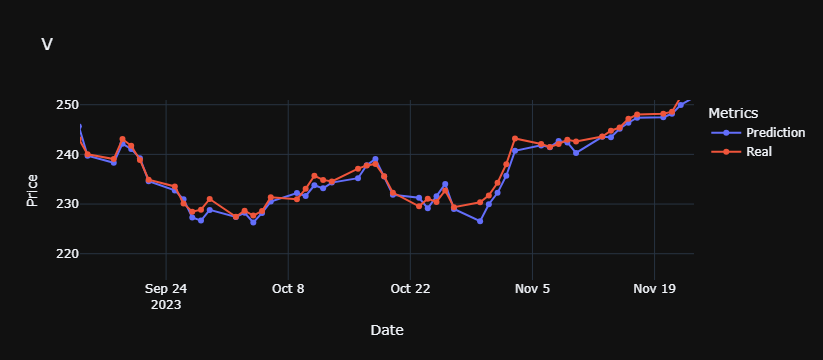

Feature columns: ['Close', 'Open', 'Volume', 'Range']
Target column: Open
Feature min [5.11569023e+01 5.08248492e+01 4.81600000e+06 2.57996438e-01]
Feature max [6.76800003e+01 6.75000000e+01 6.51723000e+07 2.64671927e+00]
Target min [50.82484916]
Target max [67.5]
Predict with X shape: (524, 20, 4)
Target min [50.82484916]
Target max [67.5]
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Loss: 0.0971 MAPE: 0.0040 R2: 0.9865


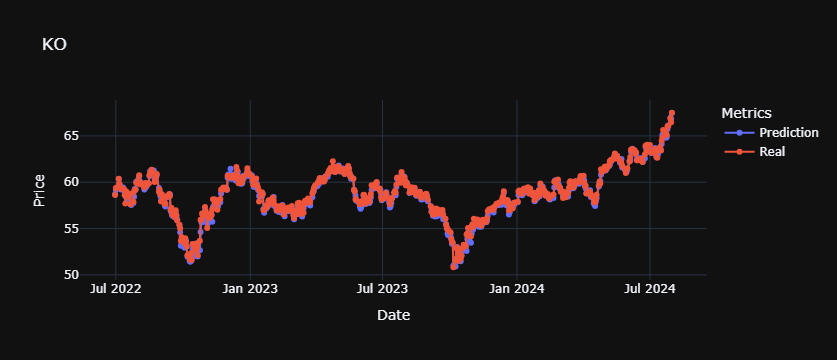

Feature columns: ['Close', 'Open', 'Volume', 'Range']
Target column: Open
Feature min [6.84646606e+01 6.87845905e+01 1.05535000e+06 6.41796857e-01]
Feature max [1.26866089e+02 1.27313675e+02 6.04367500e+07 1.52577443e+01]
Target min [68.7845905]
Target max [127.31367539]
Predict with X shape: (524, 20, 4)
Target min [68.7845905]
Target max [127.31367539]
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Loss: 1.0918 MAPE: 0.0073 R2: 0.9895


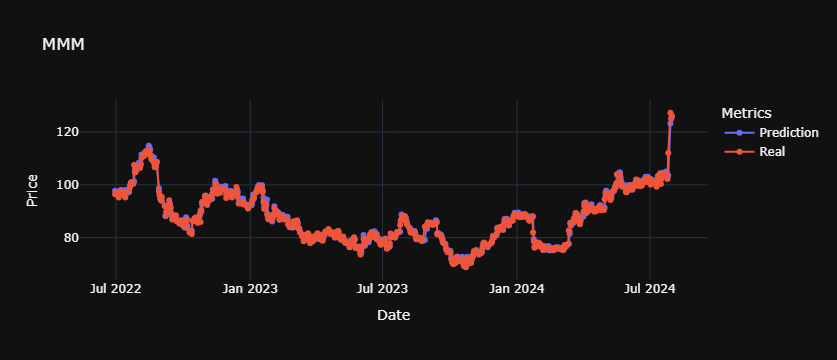

Feature columns: ['Close', 'Open', 'Volume', 'Range']
Target column: Open
Feature min [9.72921600e+01 9.71394890e+01 3.22050000e+06 8.05775628e-01]
Feature max [2.16869995e+02 2.15630005e+02 4.39313000e+07 1.04222601e+01]
Target min [97.13948901]
Target max [215.63000488]
Predict with X shape: (524, 20, 4)
Target min [97.13948901]
Target max [215.63000488]
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Loss: 1.7015 MAPE: 0.0069 R2: 0.9981


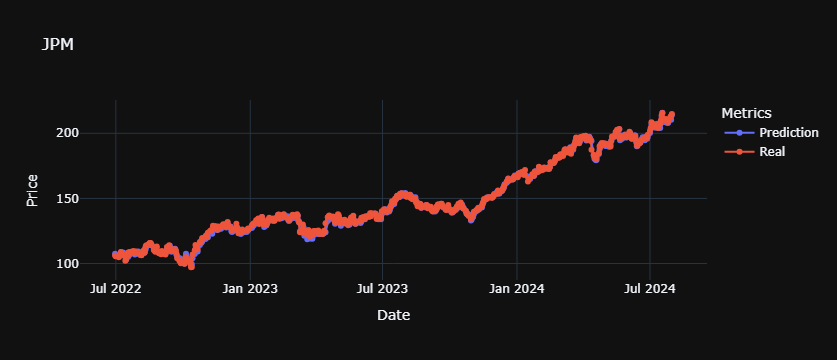

Feature columns: ['Close', 'Open', 'Volume', 'Range']
Target column: Open
Feature min [3.81520348e+01 3.81552592e+01 6.28750000e+06 2.59824910e-01]
Feature max [7.08281097e+01 7.09976223e+01 9.76587000e+07 2.41407830e+00]
Target min [38.15525924]
Target max [70.99762232]
Predict with X shape: (524, 20, 4)
Target min [38.15525924]
Target max [70.99762232]
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Loss: 0.2121 MAPE: 0.0053 R2: 0.9960


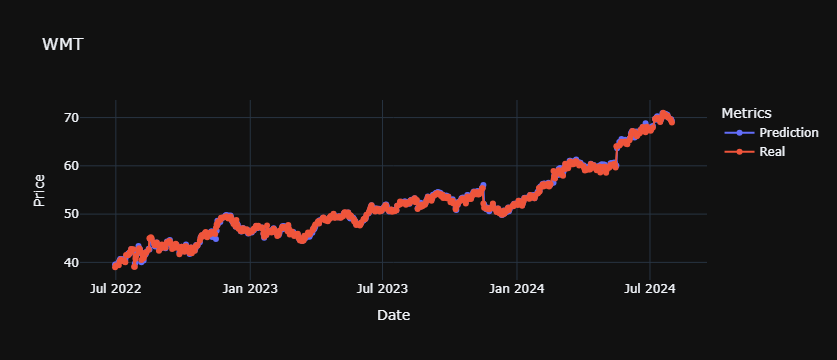

Feature columns: ['Close', 'Open', 'Volume', 'Range']
Target column: Open
Feature min [2.80413910e+02 2.74377685e+02 9.44400000e+05 2.04093821e+00]
Feature max [4.87242432e+02 4.87132730e+02 1.06953000e+07 1.87717095e+01]
Target min [274.37768539]
Target max [487.13273043]
Predict with X shape: (524, 20, 4)
Target min [274.37768539]
Target max [487.13273043]
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Loss: 13.8073 MAPE: 0.0073 R2: 0.9945


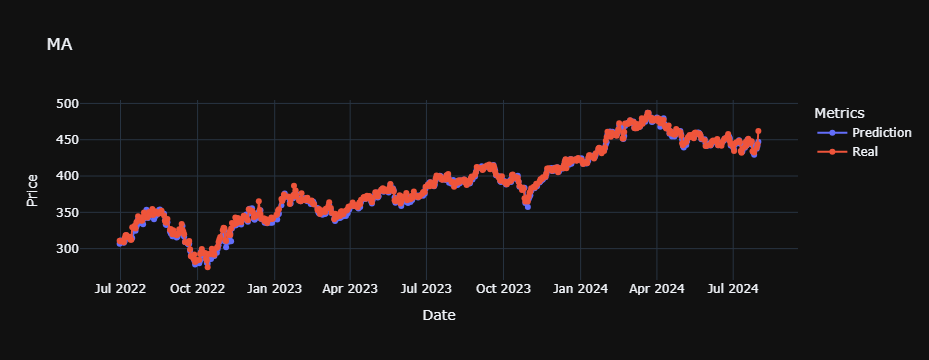

In [4]:
start_date = '2022-06-01'
end_date = '2024-08-01'
# List of company stocks to test with

#test_ticker = ['QCOM', 'NFLX', 'V', 'KO', 'TSLA']
test_ticker = ["V", "KO", "MMM", "JPM", "WMT", "MA"]
combined_data = get_stock_data(test_ticker, "1d", start_date, end_date)

for ticker in combined_data['Ticker'].unique():
    data = combined_data[combined_data['Ticker'] == ticker]
    stock_model.predict(data, ticker)